<AxesSubplot:xlabel='t'>

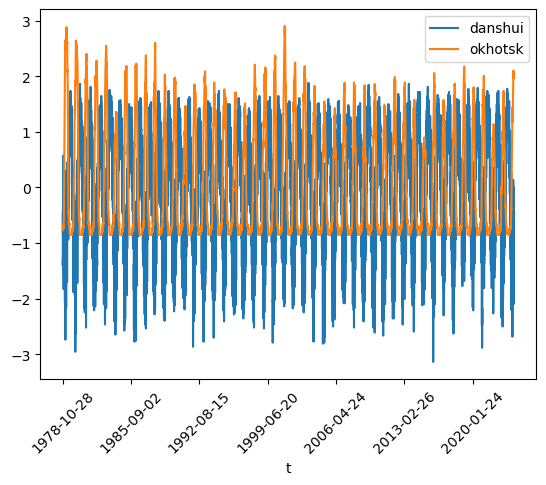

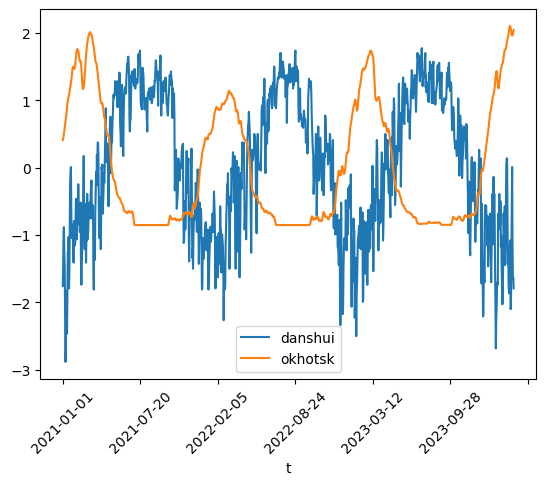

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import statsmodels
from statsmodels.tsa import stattools

df = pd.read_csv("data.csv", index_col="t")

scaler = sklearn.preprocessing.StandardScaler()
cols = ["danshui", "okhotsk"]
df[cols] = scaler.fit_transform(df[cols])

df.plot(rot=45)
df[df.index >= "2021-01-01"].plot(rot=45)

In [3]:
for variable in df.columns:
    result = statsmodels.tsa.stattools.adfuller(df[variable], maxlag=200)
    p_value = result[1]
    usedlag = result[2]

    if p_value < 0.01:
        print(f" {variable} is stationary, usedlag={usedlag}")
    else:
        print(f"{variable} is not stationary")

 danshui is stationary, usedlag=163
 okhotsk is stationary, usedlag=46


minimum at: 33


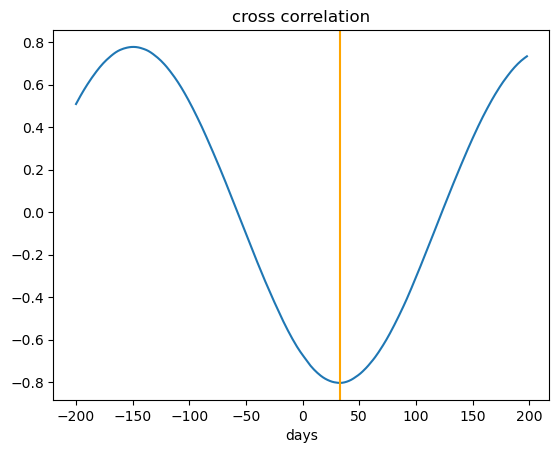

In [4]:
nlags = 200
k = 0
ccf = statsmodels.tsa.stattools.ccf(df.okhotsk[k:], df.danshui[:len(df)-k], nlags=nlags)
ccf_neg = np.flip(statsmodels.tsa.stattools.ccf(df.danshui[:len(df)-k], df.okhotsk[k:], nlags=nlags))
ccf = np.concatenate([ccf_neg, ccf[1:]])
x = range(-nlags, nlags-1)
peak = x[np.argmax(np.abs(ccf))]

print(f"minimum at: {peak}")
plt.title("cross correlation")
plt.xlabel("days")
plt.plot(x, ccf)
plt.axvline(peak, c='orange')

In [5]:
granger = statsmodels.tsa.stattools.grangercausalitytests(df[["okhotsk", "danshui"]], [np.abs(peak)], verbose=False)
p_value = granger[np.abs(peak)][0]["ssr_ftest"][1]
if p_value < 0.01:
    print("granger causality significant")
else:
    print("granger causality not significant")

/home/shaoyu/.local/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


granger causality significant
